In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Dataset

In [49]:
X_train = np.loadtxt('/kaggle/input/classification/input.csv',delimiter=',')
Y_train = np.loadtxt('/kaggle/input/classification/labels.csv',delimiter=',')

X_test = np.loadtxt('/kaggle/input/classification/input_test.csv',delimiter=',')
Y_test = np.loadtxt('/kaggle/input/classification/labels_test.csv',delimiter=',')
X_train = X_train/255
X_test = X_test/255
X_train = X_train.reshape(-1, 100, 100, 3)
X_test = X_test.reshape(-1,100,100,3)


In [51]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400,)


# Model

In [44]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(), # the Fully connected layer
    Dense(64,activation='relu'),  # 64 is the number of neurons in this hidden layer
    Dense(1,activation='sigmoid') # the output neuron
])

In [65]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics= ['accuracy'] )

In [103]:
model.fit(X_train,Y_train,epochs = 10,batch_size = 64 )

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 0.8097 - loss: 0.4462
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 391ms/step - accuracy: 0.8216 - loss: 0.4000
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 383ms/step - accuracy: 0.8448 - loss: 0.3623
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 389ms/step - accuracy: 0.8578 - loss: 0.3268
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 393ms/step - accuracy: 0.8866 - loss: 0.2894
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step - accuracy: 0.8824 - loss: 0.2769
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 381ms/step - accuracy: 0.9180 - loss: 0.2211
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 397ms/step - accuracy: 0.9214 - loss: 0.2091
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 382ms/step - accuracy: 0.9471 - loss: 0.1767
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.9663 - loss: 0.1273


# Evaluate performance on Test Dataset

In [105]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6611 - loss: 0.8319


[0.7606408596038818, 0.6899999976158142]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The Model predicts : Dog with accuracy : [[99.982285]]%


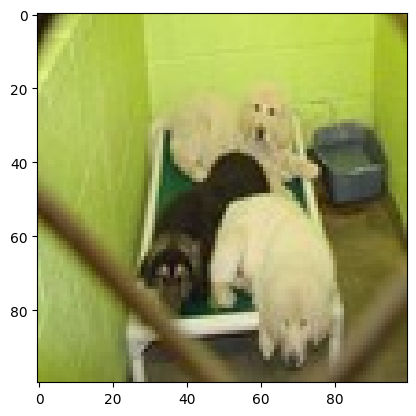

In [118]:
idx = random.randint(0,len(X_test))
img = X_test[idx,:]
plt.imshow(img)
y_acc = model.predict(img.reshape(1,100,100,3))
y_pred = y_acc > 0.5

if y_pred == 0:
  print(F"The Model predicts : Dog with accuracy : {100-(y_acc * 100)}%")
else:
  print(F"The Model predicts : Cat with accuracy : {y_acc * 100}%")  